In [ ]:
# Cleaned Normalization Train Set

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Load into a DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)


Saving augmented_train.csv to augmented_train.csv


In [ ]:
print(df.shape)
print(df['num_different_species'].unique())

In [ ]:
# Make a copy of the original dataframe
df2 = df.copy()

# Select only the numeric columns in the data for future visualizations prior to normalizing the data.
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Display the first few rows of the normalized data
print(df2.head())

  hotspot_id       lon       lat   county county_code    state state_code  \
0   L2614154  0.664849  0.321448  Autauga   US-AL-001  Alabama      US-AL   
1   L9447486  0.664107  0.319872  Autauga   US-AL-001  Alabama      US-AL   
2   L2612766  0.659302  0.316095  Autauga   US-AL-001  Alabama      US-AL   
3  L10105136  0.665036  0.322580  Autauga   US-AL-001  Alabama      US-AL   
4  L10695420  0.665038  0.322574  Autauga   US-AL-001  Alabama      US-AL   

   num_complete_checklists  num_different_species     bio_1  ...    bio_19  \
0                 0.000431               0.087866  0.745902  ...  0.264890   
1                 0.000575               0.033473  0.748380  ...  0.262802   
2                 0.001150               0.209205  0.745533  ...  0.262755   
3                 0.002587               0.129707  0.741227  ...  0.267688   
4                 0.002155               0.104603  0.739454  ...  0.267693   

     bdticm    bldfie    cecsol    clyppt    orcdrc    phihox    slt

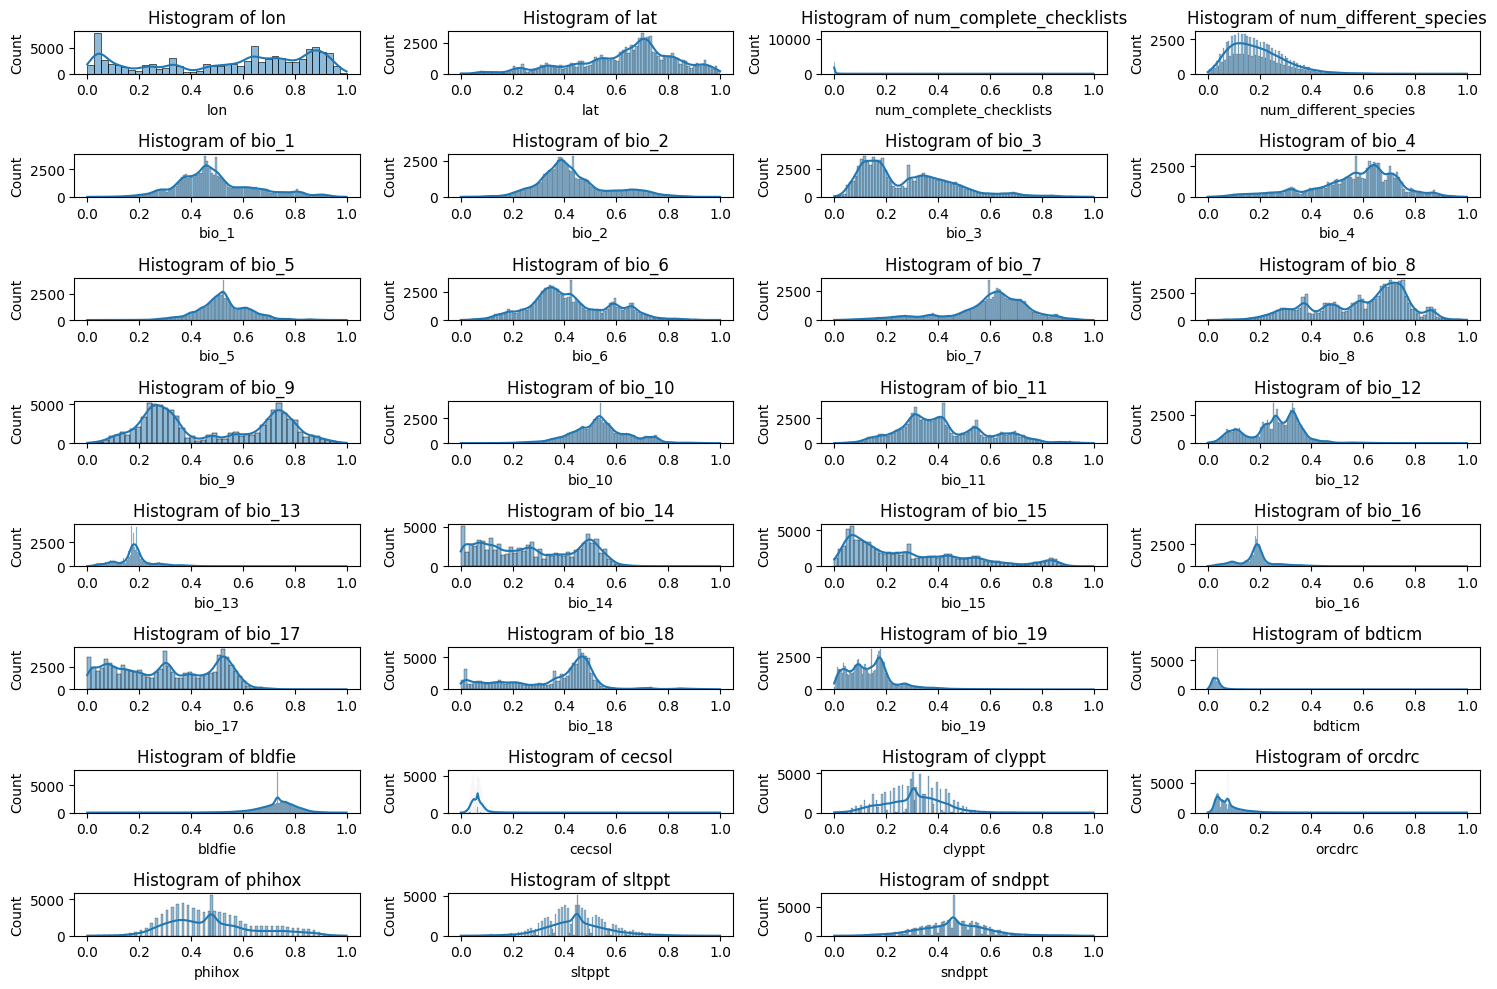

In [ ]:
# Create histograms for all numeric columns. Check for the distribution.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 4 + 1, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


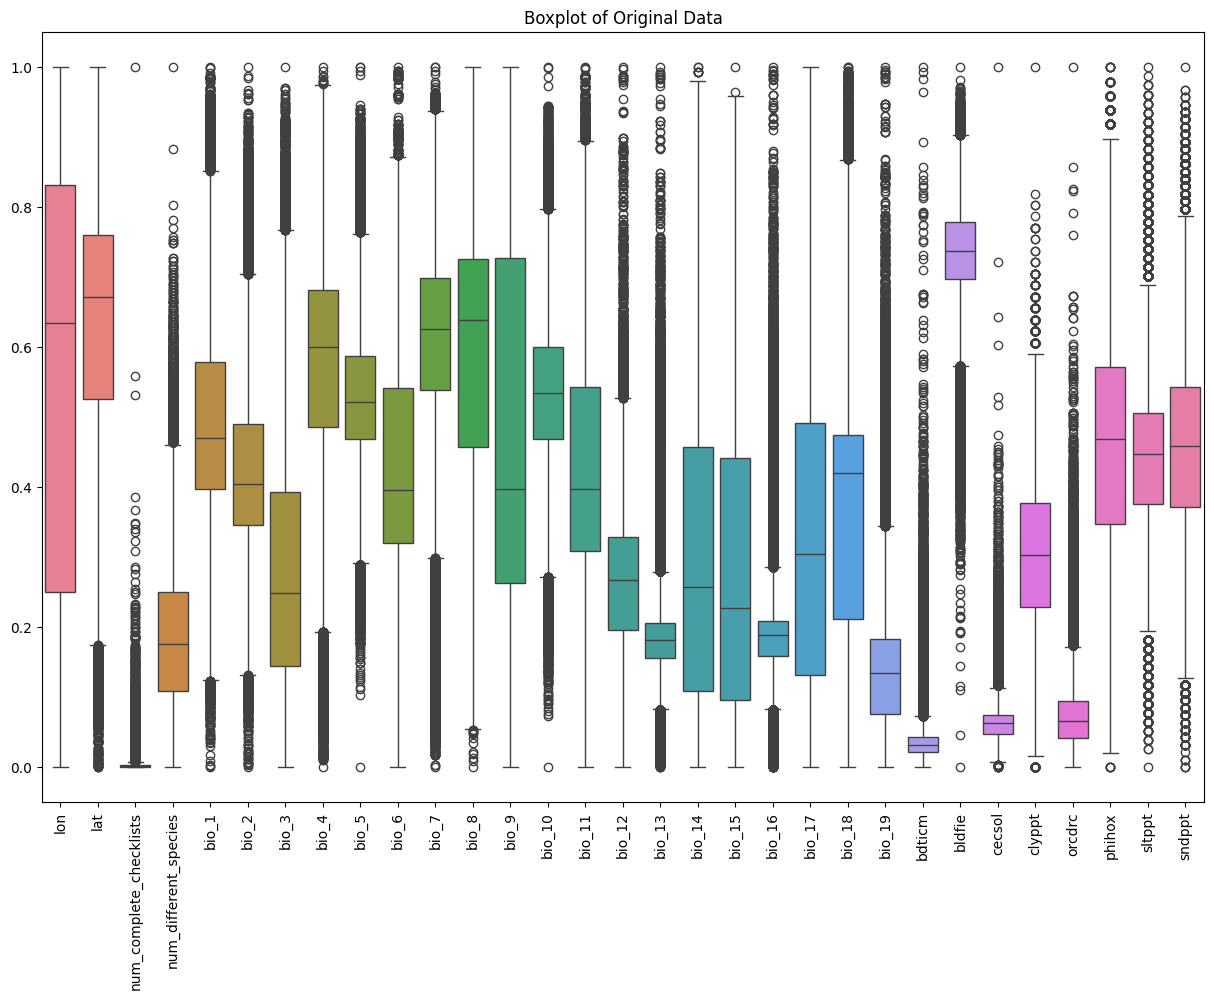

In [ ]:
# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Original Data")
plt.show()

In [ ]:
# Find the median longitude and latitude in the augmented data set.
median_longitude = df2['lon'].median()
median_latitude = df2['lat'].median()


# Find the average longitude and latitude in the augmented data set.
mean_longitude = df2['lon'].mean()
mean_latitude = df2['lat'].mean()


# Display the median/mean longitude and latitudes. Round the results to the fourth decimal place. This gives for a feel of if the data may be heavily skewed.
print(f'The median longitude is {round(median_longitude, 4)} and the median latitude is {round(median_latitude, 4)}.')
print(f'The mean longitude is {round(mean_longitude, 4)} and the mean latitude is {round(mean_latitude, 4)}.')

The median longitude is 0.6349 and the median latitude is 0.6725.
The mean longitude is 0.5447 and the mean latitude is 0.6352.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer


# Filter numeric columns (only int or float types)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Copy the original data to keep unchanged columns intact
transformed_data = df.copy()

# Apply skewness correction for each numeric column
for column in numeric_columns.columns:
    # Calculate the skewness of the column
    skewness = stats.skew(numeric_columns[column].dropna())  # Drop NaN to calculate skewness

    # Apply transformation based on the skewness
    if skewness > 1:
        # If positively skewed, apply log transformation (handle zeros separately)
        if (numeric_columns[column] > 0).all():  # Only apply log if all values are positive
            transformed_data[column] = np.log1p(numeric_columns[column])  # log(1 + X) to handle zero values
        else:
            # Apply Box-Cox if there are no zeros, add small constant to avoid zero issues
            transformed_data[column], _ = stats.boxcox(numeric_columns[column] + 1e-6)

    elif 0.5 < skewness <= 1:
        # Apply Yeo-Johnson transformation for moderately skewed data
        pt = PowerTransformer(method='yeo-johnson', standardize=False)
        transformed_data[column] = pt.fit_transform(numeric_columns[[column]])

    else:
        # If the skewness is low, leave the column as is (no transformation)
        transformed_data[column] = numeric_columns[column]

# Now, transformed_data contains the transformed numeric columns and any unchanged non-numeric columns
print(transformed_data.head())


  hotspot_id       lon       lat   county county_code    state state_code  \
0   L2614154  0.664849  0.321448  Autauga   US-AL-001  Alabama      US-AL   
1   L9447486  0.664107  0.319872  Autauga   US-AL-001  Alabama      US-AL   
2   L2612766  0.659302  0.316095  Autauga   US-AL-001  Alabama      US-AL   
3  L10105136  0.665036  0.322580  Autauga   US-AL-001  Alabama      US-AL   
4  L10695420  0.665038  0.322574  Autauga   US-AL-001  Alabama      US-AL   

   num_complete_checklists  num_different_species     bio_1  ...    bio_19  \
0               -33.002613               0.075292  0.416894  ... -1.034756   
1               -29.886898               0.031498  0.417663  ... -1.039443   
2               -23.432990               0.148453  0.416779  ... -1.039547   
3               -17.458975               0.103840  0.415437  ... -1.028510   
4               -18.673242               0.087194  0.414883  ... -1.028499   

     bdticm    bldfie    cecsol    clyppt    orcdrc    phihox    slt

In [ ]:
  # Convert dataset in this notebook to a downloadable .csv File. This will download onto your computer to use in the next step to input into the data loader for the model.
transformed_data.to_csv("normalized_train.csv", index = False)
files.download("normalized_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>